In [35]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


## Loading of Data and Initial EDA

In [36]:
df = pd.read_csv('data/dataset_B_05_2020.csv')
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [38]:
# Setting paramters for matplotlib graphs to default to this size
plt.rcParams['figure.figsize'] = (20,10)

The target variable in this project is going to be the `status` column, which has string values of `phishing` and `legitimate`.

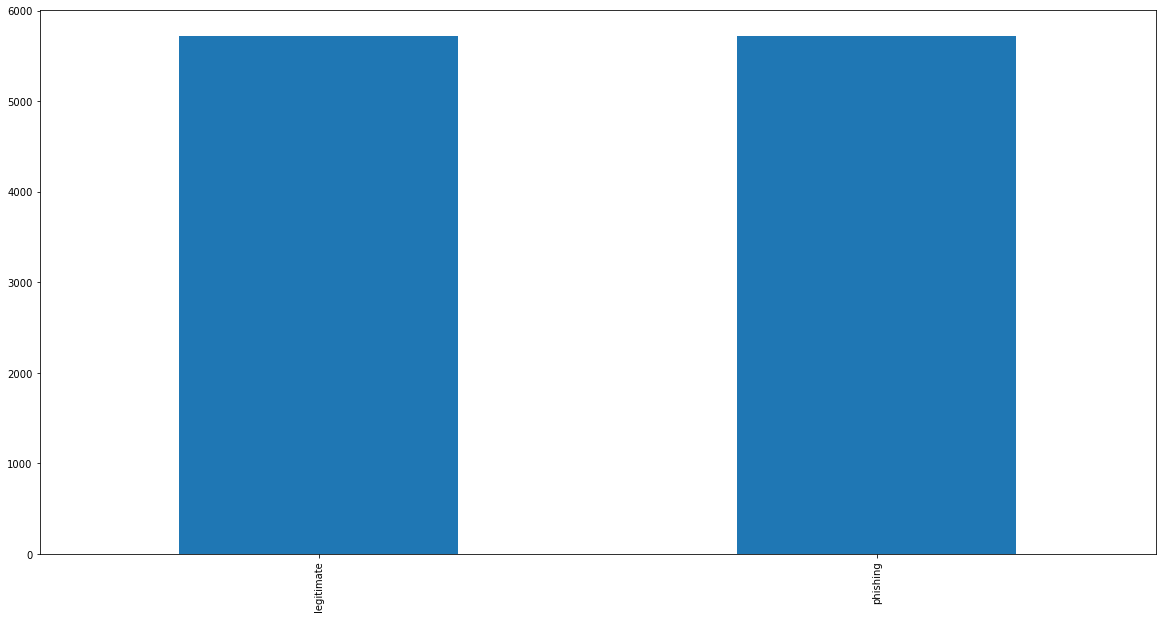

In [39]:
# Visualizing initial split of our target variable. There is an even split between the phishing and legitimate values,
# so we do not have any class imbalance here.
df['status'].value_counts().plot(kind='bar');

In [40]:
# Created simple for loop to print out values in each column just to visualize and investigate
# Commented this out since the output is very lengthy
# for c in df.columns:
#    print("---- %s ---" % c)
#3    print(df[c].value_counts())

In [41]:
# Exploring the data based on the value counts above just to visualize what some URLs would look like
df.loc[df['longest_words_raw'] == 829]
df['url'][6791]

'http://systemupdatingserverservice.secureonlineaccessupdate.com/Chase/home/auth/Confirmed.php?Fetch=3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d2b5b205573657220496e666f202d2043686173652052655a756c7a205d2b3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d0d0a557365724944203a206467666764686667680d0a50617373776f72642020203a2064747268686667676866676a0d0a4669727374204e616d653a2065737464676668676a680d0a4c617374204e616d653a20646866676a686b0d0a416464726573733a20323334206668676768686a0d0a436974793a20747274797569696f0d0a53746174653a2065646f0d0a5a69703a2032333534350d0a50686f6e653a203938303635373836350d0a536f6369616c205365637572697479204e756d6265723a203535343533393935350d0a4d6f746865722773204d616964656e204e616d653a2064676664676867660d0a44617465206f662042697274683a2032333435363736352028204d6f6e7468202d20446179202d205965617220290d0a3d3d3d3d3d3d3d3d3d3d3d3d3d205b2042616e6b2026204361726420496e666f205d203d3d3d3d3d3d3d3d3d3d3d3d3d0d0a43617264204272616e643&header=1'

In [42]:
# Calling describe just to get a general breakdown of the dataset.
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [43]:
df.columns
df['longest_words_raw'].max()

829

In [44]:
# Dropped these columns because all the values present in these columns were 0
columns_to_drop = ['nb_or', 'nb_space', 'submit_email','ratio_intRedirection','ratio_intErrors', 'ratio_nullHyperlinks', 'sfh' ]
df_dropped = df.copy().drop(columns = columns_to_drop)

In [45]:
# Since this is a classification project, I am changing the values in the status columns from legitimate: 0
# and the values of phishing: 1
df_label = pd.DataFrame(df_dropped['status'].copy())
phish = df_label.replace({"status": {"legitimate" : 0, 
                                "phishing" : 1}})
df_dropped['status'] = phish

In [46]:
df_dropped 

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,0
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,1,...,1,0,0,211,6728,0,0,1,0,1
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,1,...,0,0,0,2809,8515,8,0,1,10,0
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,0


### Some functions to be used throughout project

In [47]:
# Function that plots correlation heatmap in batches since there are so many initial features
def partial_heatmap(data, start, stop):
    y = data['status']
    df = data.iloc[:, start:stop]
    sns.heatmap(df.corr(), annot=True, fmt='.2f')
    plt.show()
    
# Function that prints out training/test scores for each metric of training and test data and corresponding confusion matrix
def score_matrix_printer(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Cleaning up scores to be more visually appealing
    ascore_train = round((accuracy_score(y_train, train_pred) * 100), 2)
    pscore_train = round((precision_score(y_train, train_pred) * 100), 2)
    rscore_train = round((recall_score(y_train, train_pred) * 100), 2)
    
    ascore_test = round((accuracy_score(y_test, test_pred) * 100), 2)
    pscore_test = round((precision_score(y_test, test_pred) * 100), 2)
    rscore_test = round((recall_score(y_test, test_pred) * 100), 2)
    
    conf_mat = plot_confusion_matrix(model, X_test, y_test)
    roc_cirve = plot_roc_curve(model, X_test, y_test)
    
    print(f"""
    Train Accuracy: {ascore_train}%
    Train Precision: {pscore_train}%
    Train Recall: {rscore_train}%
    ------------------------------
    Test Accuracy: {ascore_test}%
    Test Precision: {pscore_test}%
    Test Recall: {rscore_test}%
    """)

def get_stats(x_columns):
    x = df[x_columns]
    results = sm.OLS(y, X).fit()
    print(results.summary())

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

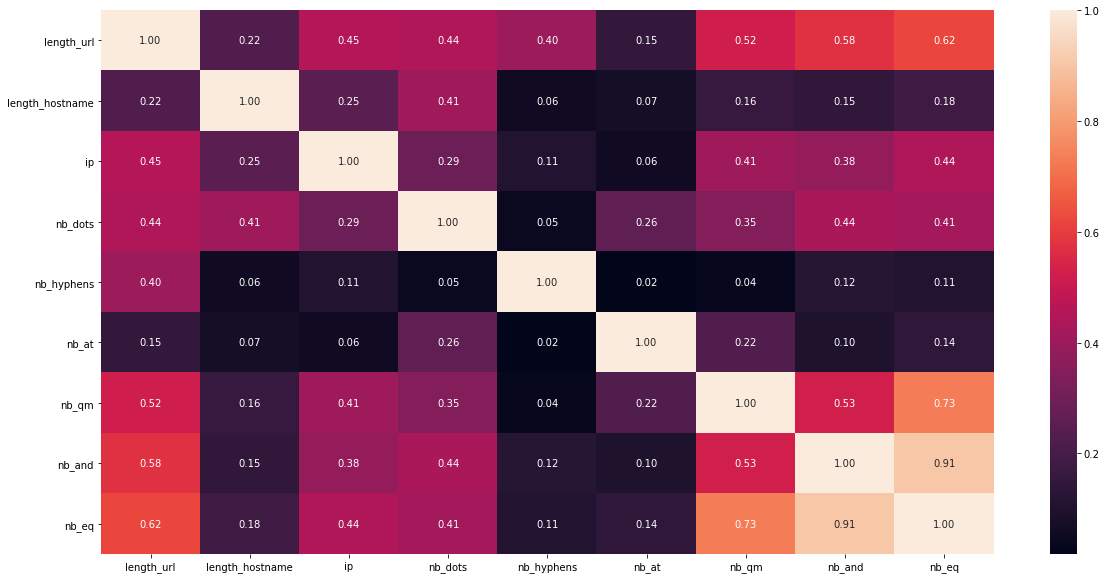

In [49]:
partial_heatmap(df_dropped, 0, 10)


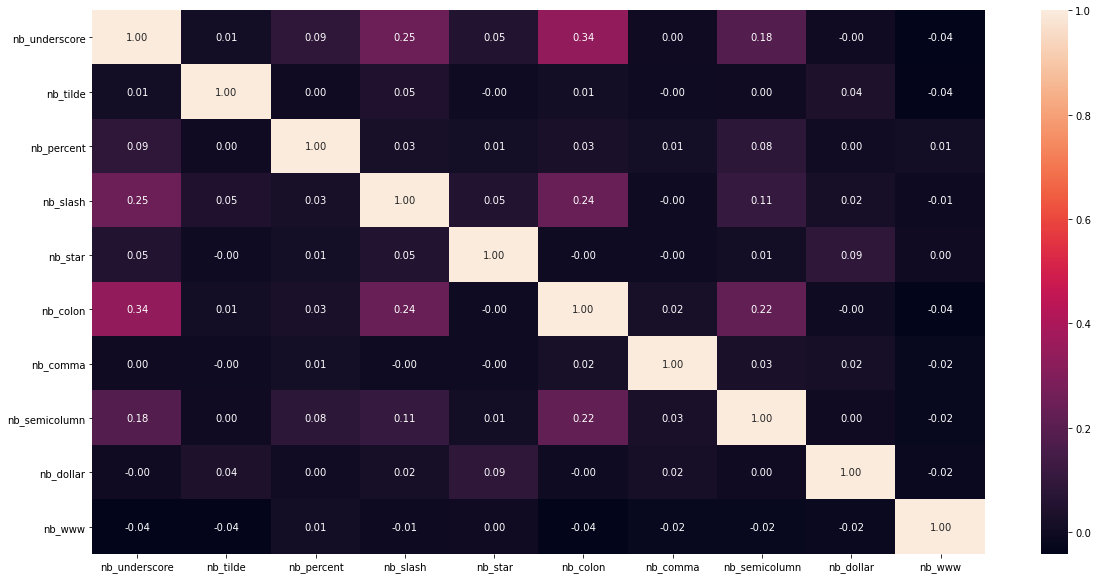

In [50]:
partial_heatmap(df_dropped, 10, 20)


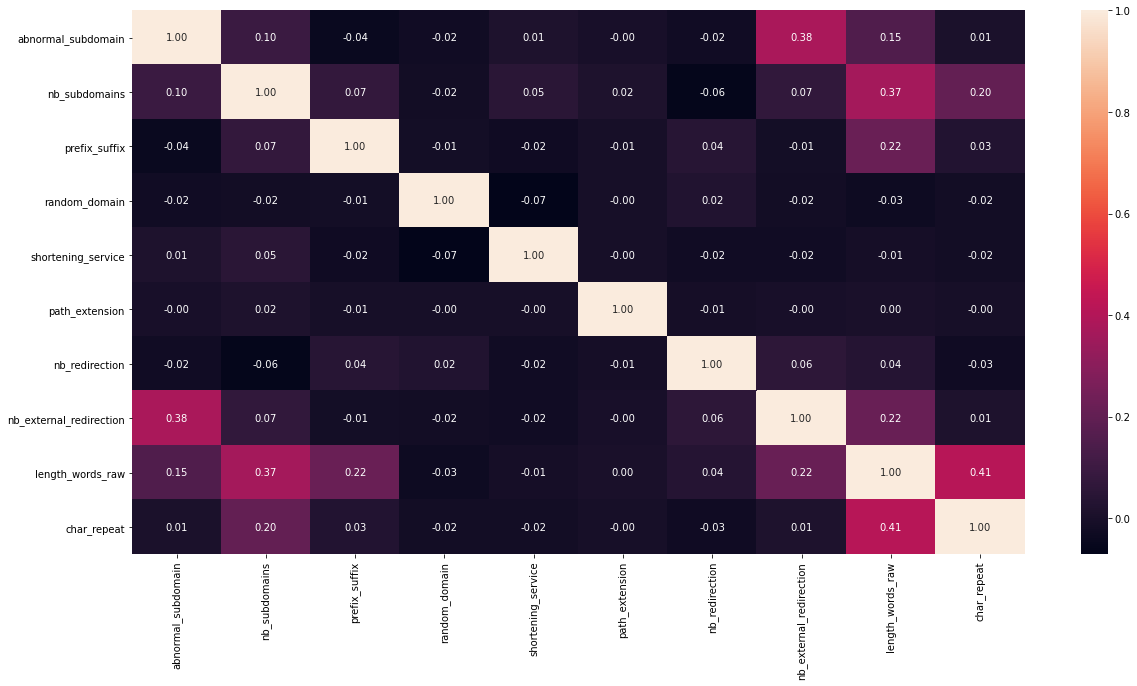

In [51]:
partial_heatmap(df_dropped, 30, 40)


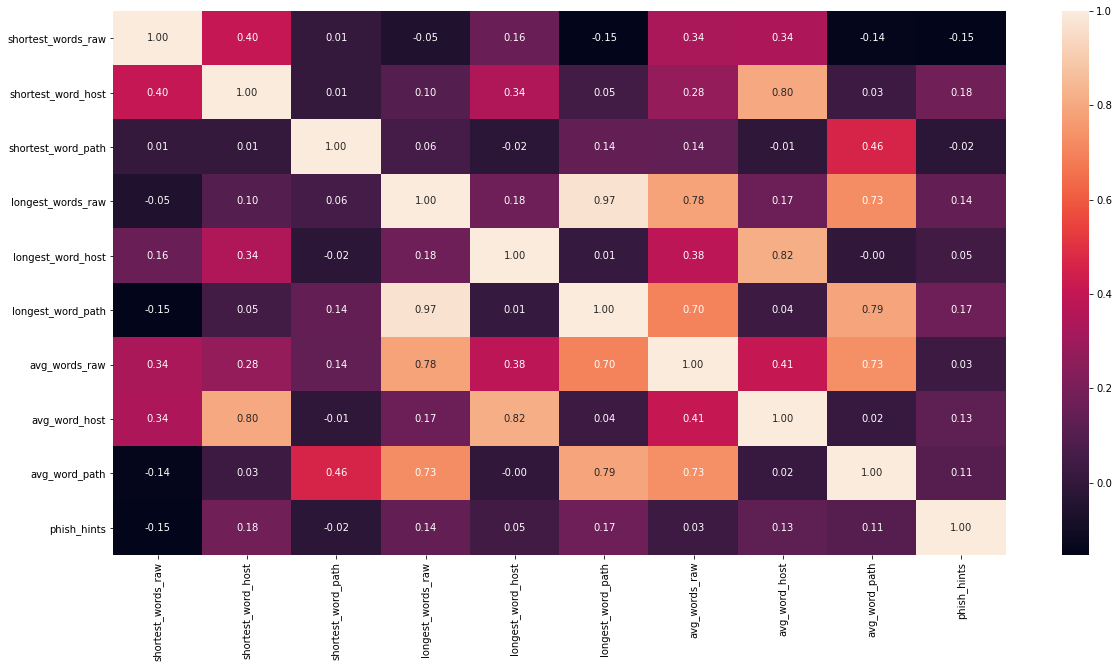

In [52]:
partial_heatmap(df_dropped, 40, 50)


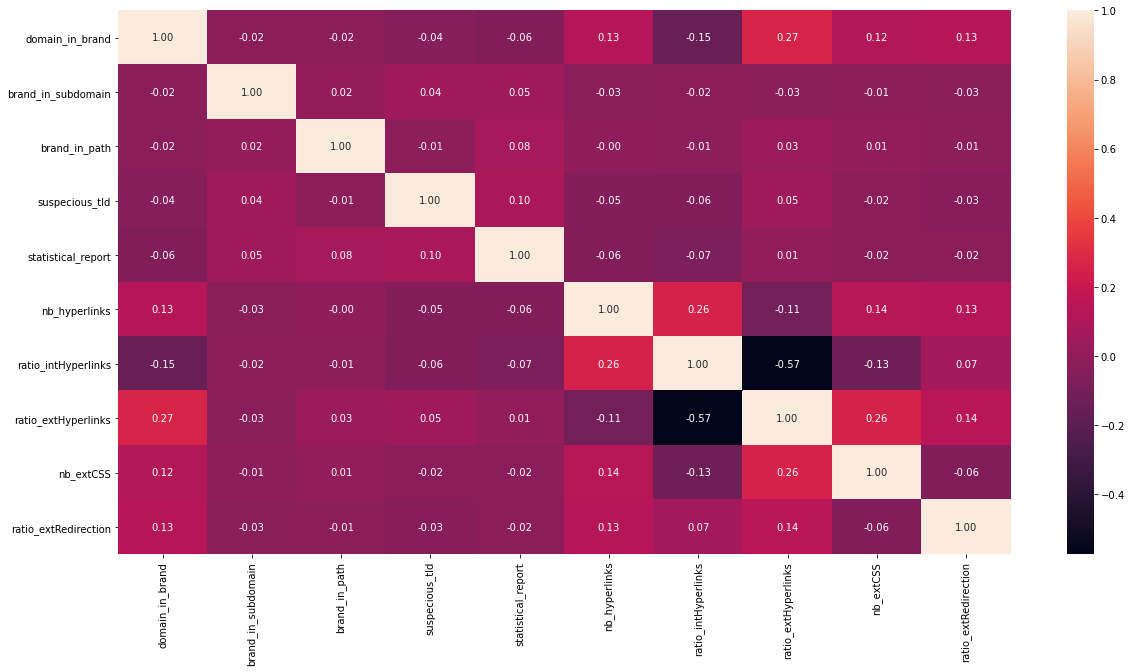

In [53]:
partial_heatmap(df_dropped, 50, 60)


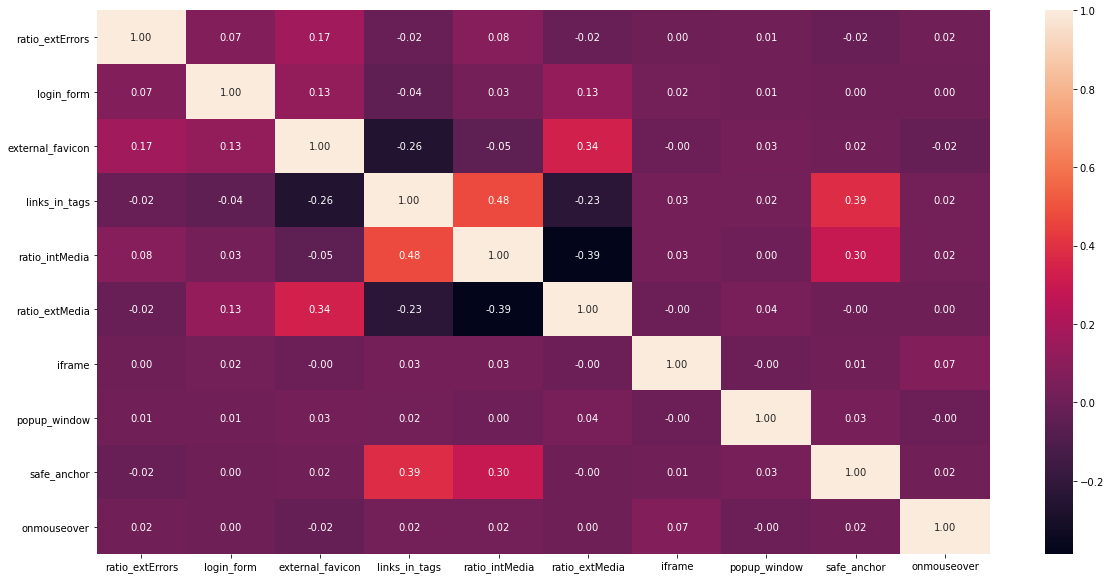

In [54]:
partial_heatmap(df_dropped, 60, 70)


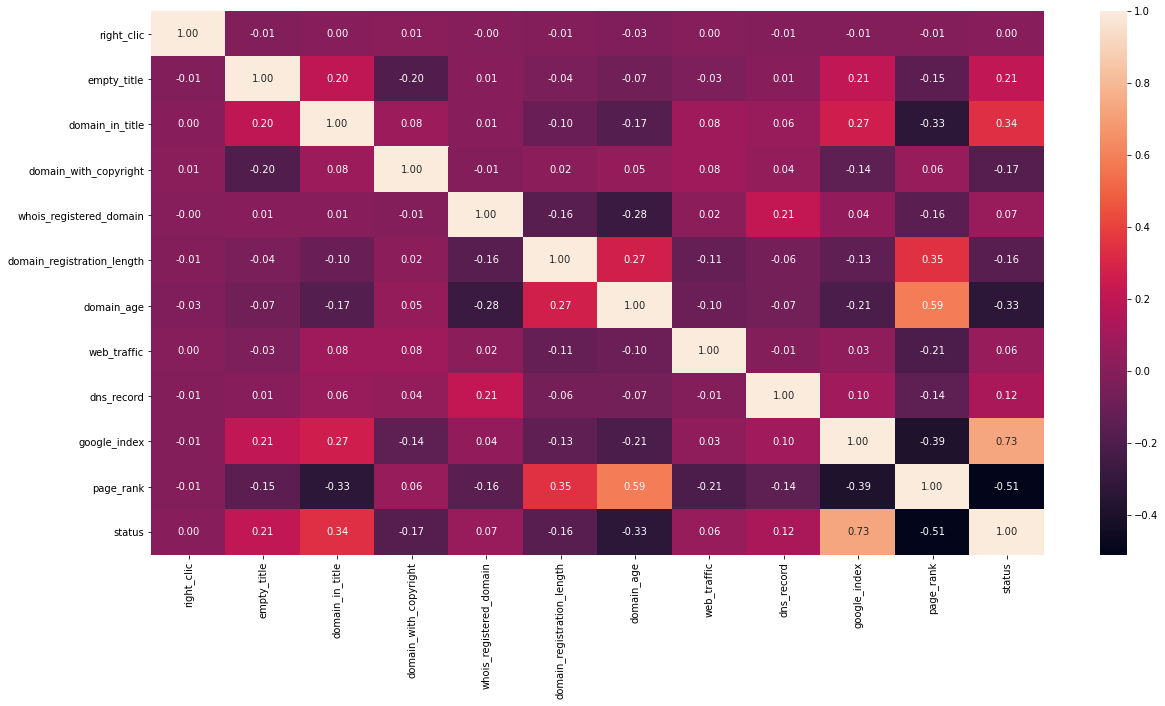

In [55]:
partial_heatmap(df_dropped, 70, 82)


After investigating multicollinearity between some variables, I decided to drop the 

My cutoff for high correlation will be X > 0.7

In [56]:
# Created a copy of dataframe where URLs are just replaced with their corresponding index
# Keeping the URLs in separate dataframe for reference
dropped_url_df = df_dropped.copy()
dropped_url_df['url'] = dropped_url_df.index

# Stepwise selection for feature importance

After exploring the collinearity of the features, I wanted to move forward with stepwise selection to identify features that would be significant to my data. <br>
Initially, the dataset had 87 features. I dropped a couple of features in my preliminary data exploration since those columns had 0 values in them. This dropped my number of features down to 82; however, I still wanted to minimize the number of features in the dataset so I could focus on what features would be most important in identifiying a phishing website. <br>
 

In [57]:
# Creating a list of the column names
x_columns = df.columns.tolist()
X = dropped_url_df
y = dropped_url_df['status']

In [58]:
# Run a summary stats to see what the p-values are. Drop features that have p-value > 0.05
get_stats(x_columns)

                                 OLS Regression Results                                
Dep. Variable:                 status   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.839e+21
Date:                Wed, 13 Apr 2022   Prob (F-statistic):                        0.00
Time:                        09:45:14   Log-Likelihood:                      2.4492e+05
No. Observations:               11430   AIC:                                 -4.897e+05
Df Residuals:                   11348   BIC:                                 -4.891e+05
Df Model:                          82                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [59]:
# based on the statistical report, these features had a p-valuen of > 0.05
features_to_drop = ['url', 'length_url', 'nb_hyphens', 'nb_and', 'nb_underscore', 'nb_tilde', 'nb_star', 'nb_comma', 'nb_semicolumn', 'nb_dollar', \
'nb_com', 'nb_dslash', 'http_in_path', 'punycode', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', \
'prefix_suffix', 'random_domain', 'path_extension', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', \
'longest_words_raw', 'longest_word_host', 'avg_words_raw', 'avg_word_host', 'brand_in_subdomain', 'brand_in_path', \
'statistical_report', 'nb_extCSS', 'ratio_extErrors', 'login_form', 'links_in_tags', 'iframe', 'popup_window', \
'onmouseover', 'right_clic', 'web_traffic']

stepwisedf = dropped_url_df.drop(columns = features_to_drop) 

In [60]:
stepwisedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_hostname             11430 non-null  int64  
 1   ip                          11430 non-null  int64  
 2   nb_dots                     11430 non-null  int64  
 3   nb_at                       11430 non-null  int64  
 4   nb_qm                       11430 non-null  int64  
 5   nb_eq                       11430 non-null  int64  
 6   nb_percent                  11430 non-null  int64  
 7   nb_slash                    11430 non-null  int64  
 8   nb_colon                    11430 non-null  int64  
 9   nb_www                      11430 non-null  int64  
 10  https_token                 11430 non-null  int64  
 11  ratio_digits_url            11430 non-null  float64
 12  ratio_digits_host           11430 non-null  float64
 13  port                        114

Based on an alpha value of significance of 0.05, we were able to drop our features from 82 features to 42 features. From here we will run an initial baseline model. 

# Baseline model (Dummy Classifier)


Since this is a classification project, I chose a DummyClassifier as my baseline model. The DummyClassifier is expected to guess whether a website is a phishing website or legitimate 50% of the time.

In [61]:
# Creating X and y variables for initial train/test split.
# This train/test split is based on the
new_X = stepwisedf.drop(columns = 'status')
new_y = stepwisedf['status']
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, random_state = 42)

C:\Users\Beter\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "



    Train Accuracy: 49.51%
    Train Precision: 49.43%
    Train Recall: 49.52%
    ------------------------------
    Test Accuracy: 49.51%
    Test Precision: 49.76%
    Test Recall: 50.21%
    


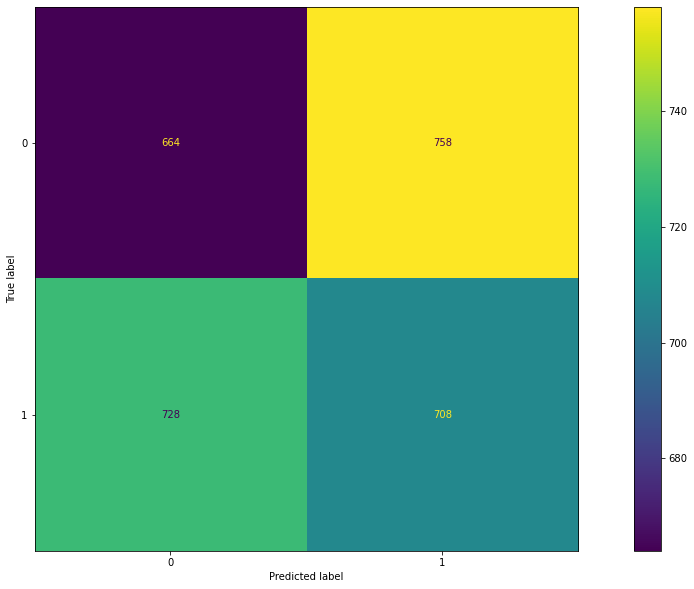

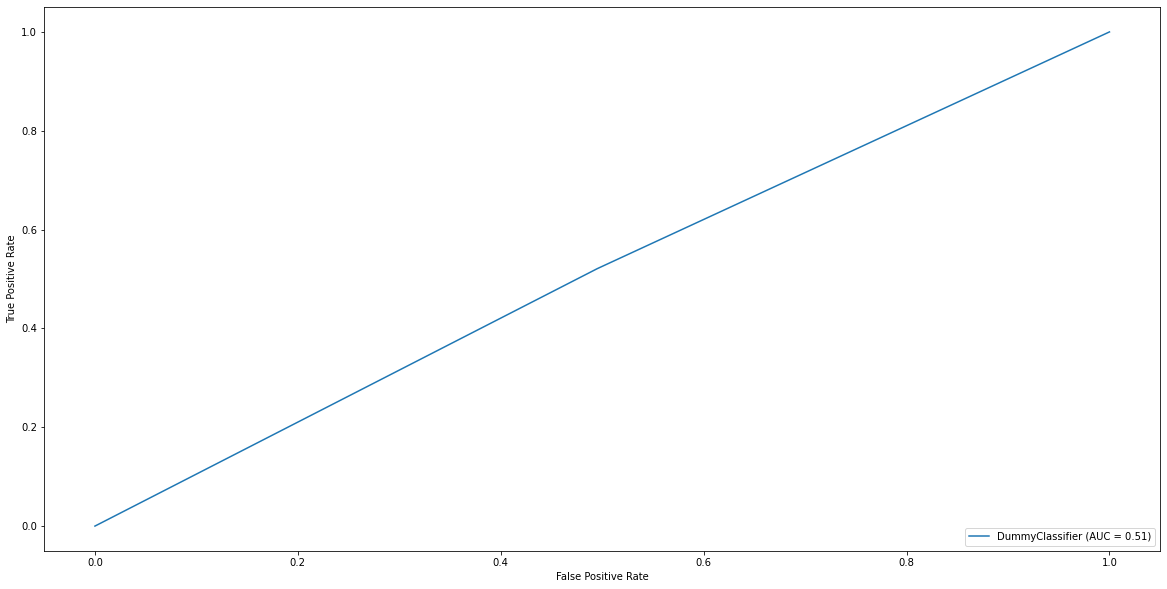

In [62]:
# Dummy Classifier as baseline model
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_train)
y_test_pred = dummy.predict(X_test)
y_pred_df = pd.DataFrame(y_pred)
dummy.score(X_test, y_test)
score_matrix_printer(dummy, X_train, y_train, X_test, y_test);

# Model 1: Logistic Regression Model

In [65]:
# Simple Logistic Regression Model 
# Set max_iter hyperparameter = 1000 since there are so many initial features
# Will likely be dropping/aggregating columns since there are a few features with high correlation w/ each other.
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)


    Train Accuracy: 94.24%
    Train Precision: 94.23%
    Train Recall: 94.23%
    ------------------------------
    Test Accuracy: 94.54%
    Test Precision: 94.38%
    Test Recall: 94.78%
    


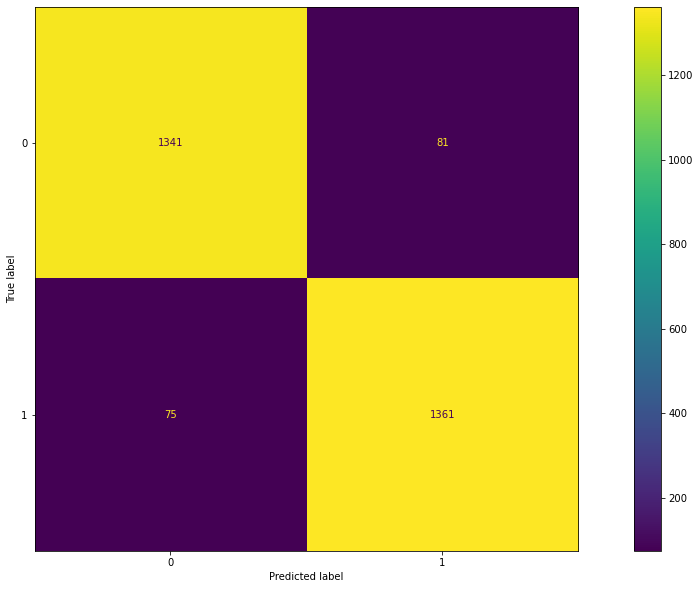

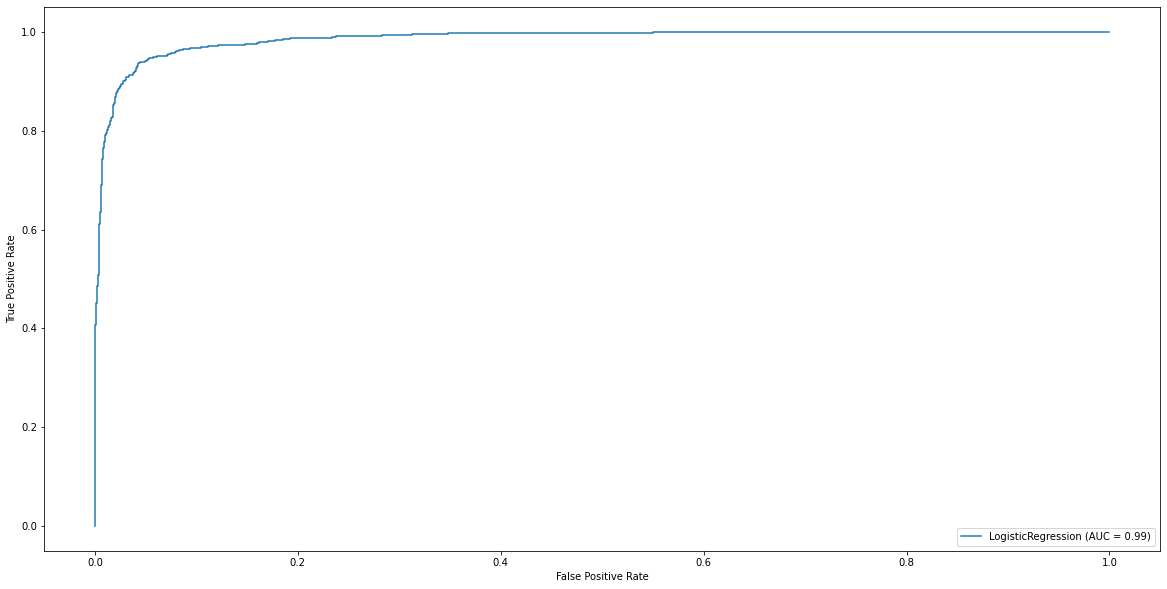

In [66]:
score_matrix_printer(lr, X_train, y_train, X_test, y_test)

In [163]:
# Since the coefficients are in log-odds, take the exponent to see the odds of each feature based on the initial logistic regression model
oddscoef = np.exp(lr.coef_)
# Put the column names and coefficients into a dataframe for ease of access
result = pd.concat([(pd.DataFrame(new_X.columns)), (pd.DataFrame(oddscoef).transpose())], axis = 1)
# Resetting column values to 0, 1
result.columns = range(result.columns.size)
# Sorting dataframe by the coefficient values
result.sort_values(by = 1, ascending = False, inplace=True)
# Selecting top 10 values of log coefficients
top_10_coefs = result.iloc[:10]
# Converting feature names to a list to run a model later based on these coefficient values
list_of_top_10_coefs = list(top_10_coefs[0])
top_10_coefs


['google_index',
 'phish_hints',
 'nb_qm',
 'ip',
 'ratio_extHyperlinks',
 'shortening_service',
 'nb_dots',
 'ratio_digits_host',
 'domain_in_title',
 'dns_record']

Overall, after reducing the amount of features from 82 to 42, the logistic regression model fits well on my training and test data; however, 42 features is still quite a bit of features when it comes to the complexity of my model. Next, I would like to focus on the coefficients of the initial Logistic Regression model as well as utilize an ExtraTreesClassifier and Recursive Feature Elimination to identify the top 10 features of my dataset in order to reduce overall model complexity. 

# Creation of Pipelines

Implemented some pipelines that will be used throughout the rest of project.

In [81]:
# LogisticRegression Pipeline
lrpipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(max_iter = 100000))
])

# RFE pipeline
rfepipe = Pipeline(steps=[
    ('rfe', RFE(estimator = modelfeatures))
])

rfcpipe = Pipeline(steps=[
    ('rfc', RandomForestClassifier(max_depth = 5, random_state = 42))
])

# Feature Importance (ExtraTreeClassifier)

Next, I run a ExtraTreeClassifier to identify the most important features in my dataset so that I can reduce the number of features. By reducing the number of features in the model, I reduce the overall complexity of the model.

# Model 2: Pipeline Integration 


    Train Accuracy: 94.21%
    Train Precision: 94.45%
    Train Recall: 93.92%
    ------------------------------
    Test Accuracy: 94.82%
    Test Precision: 94.48%
    Test Recall: 95.26%
    


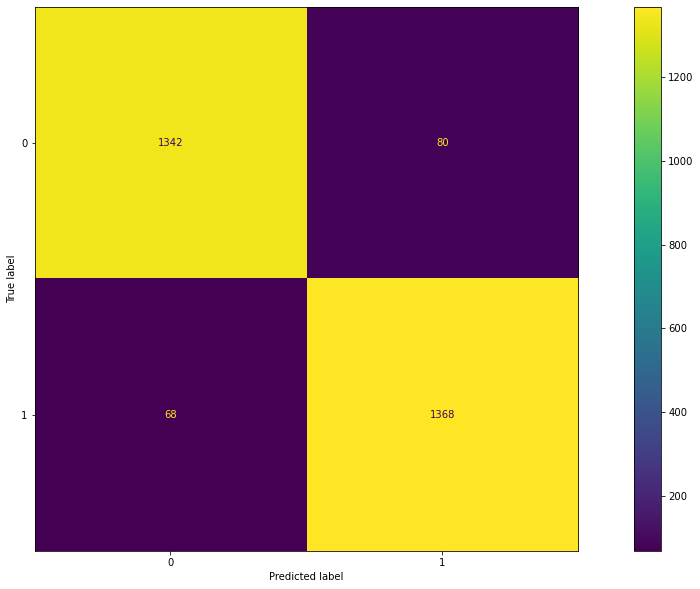

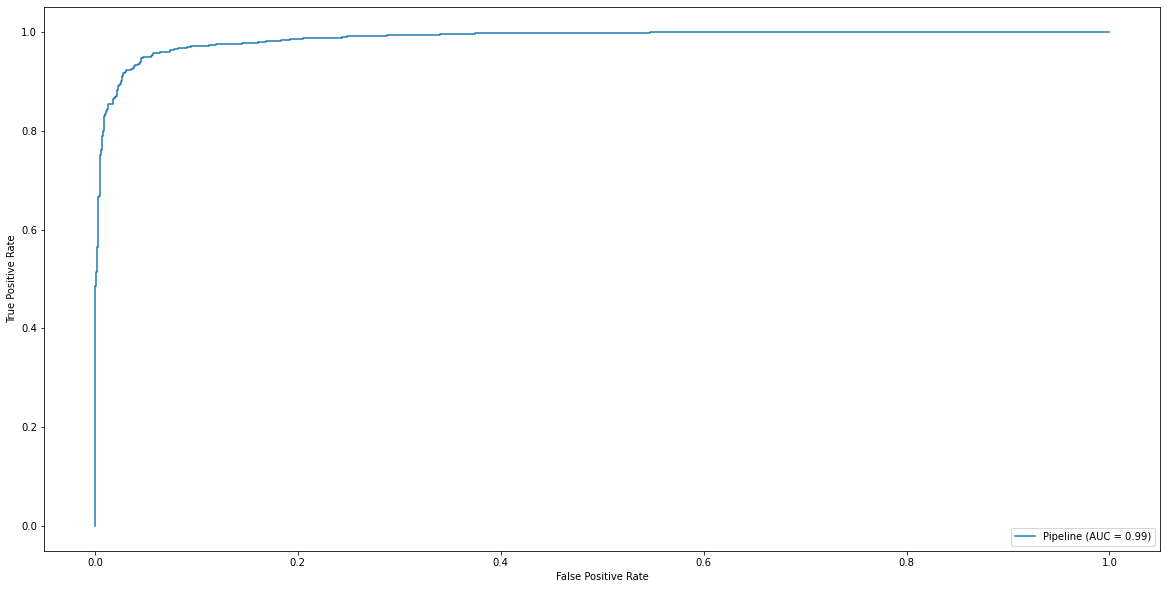

In [69]:
# LogisticRegression pipeline with StandardScalar step
lrpipe.fit(X_train, y_train)
lr_pipe_preds = lrpipe.predict(X_train)
score_matrix_printer(lrpipe, X_train, y_train, X_test, y_test)

As you can see, the logistic regression pipeline with the StandardScalar step produced a very similar model to that of the initial Logistic Regression model. Next I will attempt to reduce the number of features by selecting the important features through an ExtraTreeClassifier.

# Feature Importance (ExtraTreeClassifier)

Next, I run a ExtraTreeClassifier to identify the most important features in my dataset so that I can reduce the number of features. By reducing the number of features in the model, I reduce the overall complexity of the model.

[1.48821772e-02 2.98555708e-02 1.23114941e-02 2.46280038e-03
 1.51555190e-02 5.87098659e-03 3.30816749e-03 1.58595187e-02
 1.86566312e-03 7.07545496e-02 7.57635721e-03 1.78228973e-02
 1.13217498e-02 5.77154819e-04 1.50291245e-02 8.79951977e-03
 1.03347891e-02 6.66205755e-05 1.30059341e-02 1.12162960e-02
 1.35570610e-02 1.13041086e-02 3.14118172e-02 1.00061229e-02
 3.36937923e-03 1.87688372e-02 3.41574475e-02 1.93086237e-02
 1.38152587e-02 9.31637226e-03 1.44615814e-02 1.42005464e-02
 2.94306020e-02 1.07132766e-02 3.43414272e-02 1.86103542e-02
 3.31001017e-03 1.30185632e-02 3.68803910e-02 2.37933720e-03
 2.83945502e-01 1.05616490e-01]


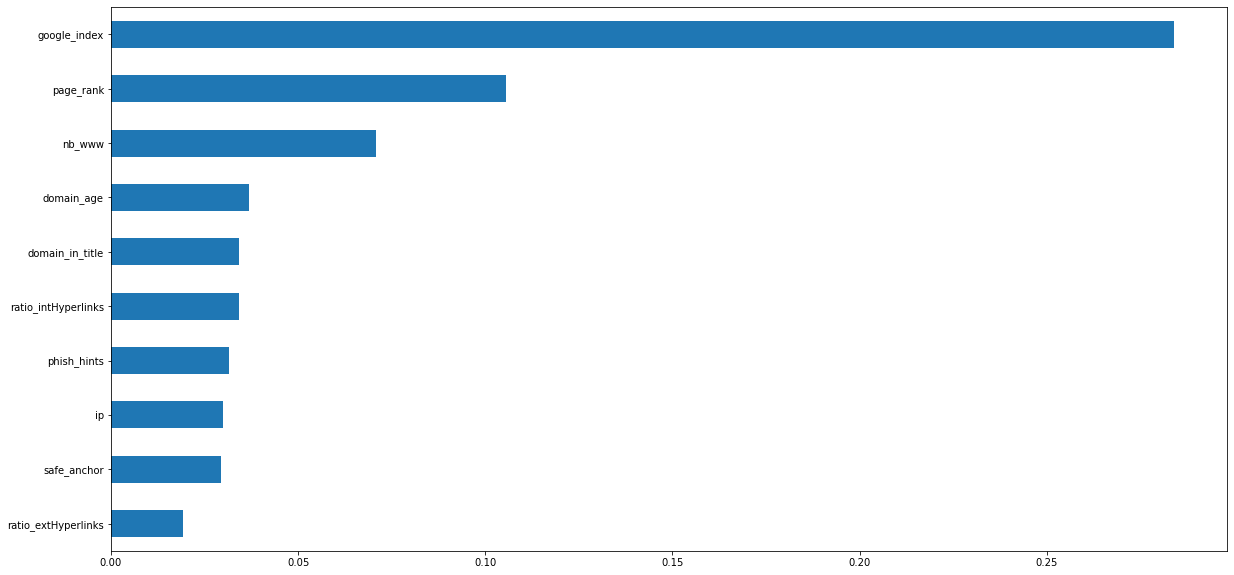

In [169]:
# Instantiate model
modelfeatures = ExtraTreesClassifier()
modelfeatures.fit(new_X, new_y)
print(modelfeatures.feature_importances_) # use built in class 'feature_importances' of tree based classifiers
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(modelfeatures.feature_importances_, index=new_X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

In [173]:
# Created a list of top features from ExtraTreeClassifier 
list_extraTree_features = ['domain_age', 'google_index', 'page_rank', 'domain_in_title', 'ip', \
    'ratio_intHyperlinks', 'ratio_extHyperlinks', 'nb_www', 'safe_anchor', 'phish_hints']

# Created a dataframe with the features identified from ExtraTreeClassifier
extraTreeX = X[list_extraTree_features]
extraTreeX

# Train/test split for top features from ExtraTreeClassifier
X1_train, X1_test, y1_train, y1_test = train_test_split(extraTreeX, y, random_state = 42)

This feature importance graph shows both the positive and negatively correlated features that may be important for detecting a phishing website.

# Model 3: Pipeline with ExtraTree features 

Using the features that I identified from the code above, I'm going to run another LogisticRegression model that solely focuses on the features that were identified in the ExtraTreeClassifier that are stored in the `list_extraTree_features` variable.


    Train Accuracy: 92.08%
    Train Precision: 91.94%
    Train Recall: 92.22%
    ------------------------------
    Test Accuracy: 92.37%
    Test Precision: 91.66%
    Test Recall: 93.31%
    


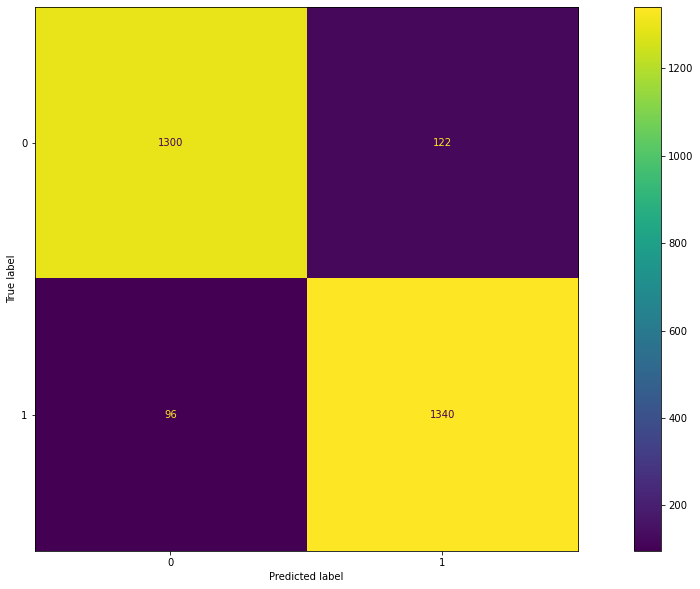

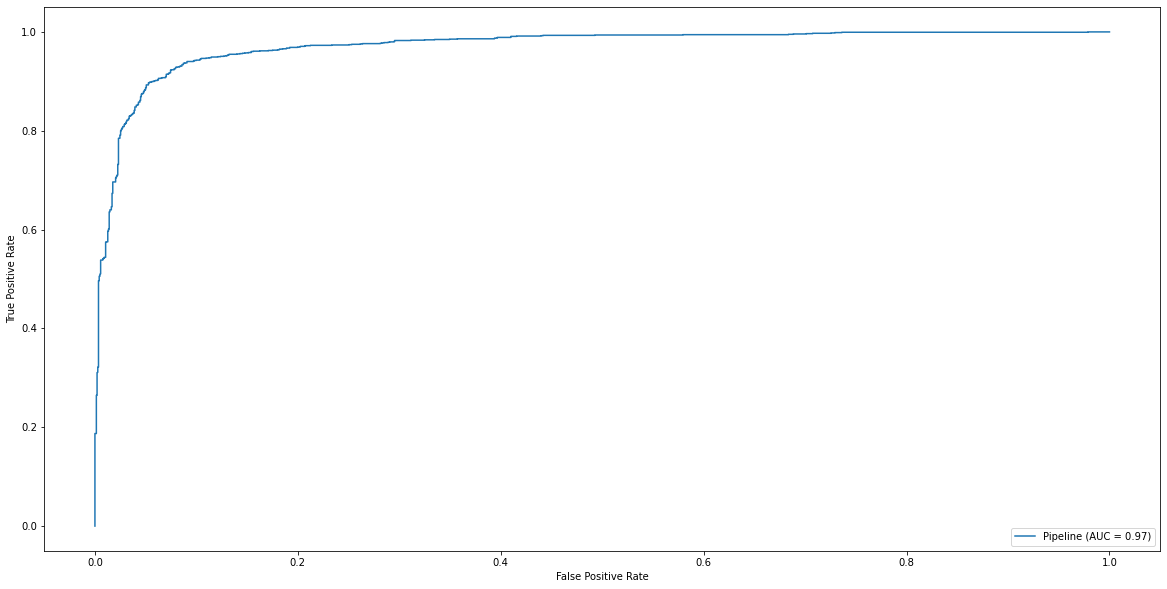

In [70]:
# Pipeline w/ StandardScalar and LogisticRegression steps w/ features selected from the ExtraTreeClassifier
lrpipe.fit(X1_train, y1_train)
lr_pipe_preds = lrpipe.predict(X1_train)
score_matrix_printer(lrpipe, X1_train, y1_train, X1_test, y1_test)

After running a pipeline model based on the top 10 features that the ExtraTreeClassifier identified. This model that focused on the features stored in the `list_extraTree_features` variable produced an accuracy score of 92% and a recall score of 93% as well as having a AUC score of 0.97. <br>
Although the overall accuracy and recall score dropped by about 2%, this is a tradeoff that I am willing to accept because we reduced the number of features in this dataset to 10 features from the stepwise selection of 42. <br>
The reduction of 32 features strongly reduces the complexity of the model and is preferred over the overly complex model.    

# Recursive Feature Elimination (RFE)

Although we have a pretty good model, I want to check and see if I can run a Recursive Feature Elimination in order to see if there were different features that may be more important than the ones identified by the ExtraTreeClassifier.

In [71]:
# Going to be trying RFE since I have so many features that will increase model complexity
# Very initial RFE process, will clean it up 
selector = RFE(estimator = modelfeatures, n_features_to_select=10)
selector.fit(X_train, y_train)

RFE(estimator=ExtraTreesClassifier(), n_features_to_select=10)

In [72]:
# Displaying the support and ranking of preliminary RFE
print(selector.support_)
print(selector.ranking_)
selectorrankinglist = selector.ranking_

[ True False False False False False False False False  True False False
 False False False False False False False False  True False False False
 False  True  True False False False False False  True False  True False
 False False  True False  True  True]
[ 1  2 15 31 11 25 26  6 30  1 24  8 19 32 13 23 17 33  5 18  1 14  4 20
 28  1  1  3 16 21  9 12  1 22  1 10 27  7  1 29  1  1]


In [170]:
columnanames = df.columns.tolist()
rfe_names = dict(zip(columnanames, selectorrankinglist))
# Created a list of important features based on RFE
important_rfe_features = ['length_hostname', 'nb_dollar', 'longest_words_raw', 'suspecious_tld', 'statistical_report', 'links_in_tags', \
'sfh', 'domain_in_title', 'onmouseover', 'domain_with_copyright', 'nb_hyperlinks', 'ip']

rfeX = df[important_rfe_features]

In [175]:
print(important_rfe_features)
print(list_extraTree_features)


['length_hostname', 'nb_dollar', 'longest_words_raw', 'suspecious_tld', 'statistical_report', 'links_in_tags', 'sfh', 'domain_in_title', 'onmouseover', 'domain_with_copyright', 'nb_hyperlinks', 'ip']
['domain_age', 'google_index', 'page_rank', 'domain_in_title', 'ip', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'nb_www', 'safe_anchor', 'phish_hints']


False


    Train Accuracy: 92.08%
    Train Precision: 91.94%
    Train Recall: 92.22%
    ------------------------------
    Test Accuracy: 92.37%
    Test Precision: 91.66%
    Test Recall: 93.31%
    


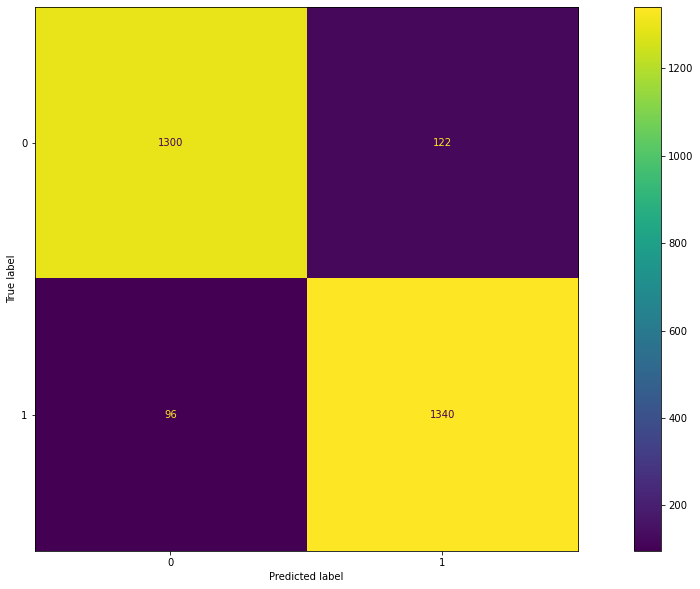

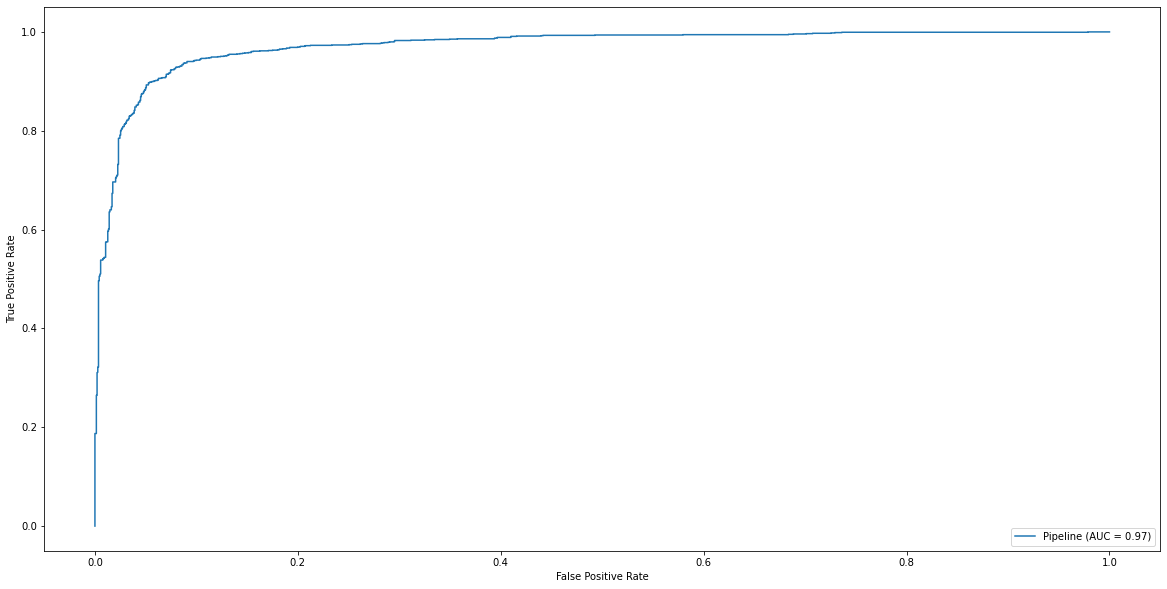

In [78]:
X2_train, X2_test, y2_train, y2_test = train_test_split(rfeX, y, random_state = 42)
lrpipe.fit(X2_train, y2_train)
lr_pipe_preds = lrpipe.predict(X2_train)
score_matrix_printer(lrpipe, X2_train, y2_train, X2_test, y2_test)

Based on the RFE, the evaluation metrics produduced were similar to the metrics produced by the modeling with the features from the ExtraTreeClassifier. Although some features overlapped, not all the features were the same. (why is this?)

## GridSearchCV for optimal hyperparameters

In [79]:
# Setting up GridSearchCV but not going to utilize it yet
# grid = {'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


# RandomForestClassifier

In [84]:
rfc = RandomForestClassifier(max_features=5, random_state=42)
rfc.fit(new_X, new_y)


RandomForestClassifier(max_features=5, random_state=42)

In [86]:
model_estimators = rfc.estimators_ 


[DecisionTreeClassifier(max_features=5, random_state=1608637542),
 DecisionTreeClassifier(max_features=5, random_state=1273642419),
 DecisionTreeClassifier(max_features=5, random_state=1935803228),
 DecisionTreeClassifier(max_features=5, random_state=787846414),
 DecisionTreeClassifier(max_features=5, random_state=996406378),
 DecisionTreeClassifier(max_features=5, random_state=1201263687),
 DecisionTreeClassifier(max_features=5, random_state=423734972),
 DecisionTreeClassifier(max_features=5, random_state=415968276),
 DecisionTreeClassifier(max_features=5, random_state=670094950),
 DecisionTreeClassifier(max_features=5, random_state=1914837113),
 DecisionTreeClassifier(max_features=5, random_state=669991378),
 DecisionTreeClassifier(max_features=5, random_state=429389014),
 DecisionTreeClassifier(max_features=5, random_state=249467210),
 DecisionTreeClassifier(max_features=5, random_state=1972458954),
 DecisionTreeClassifier(max_features=5, random_state=1572714583),
 DecisionTreeClass

In [112]:
rfc.feature_importances_

array([2.27169693e-02, 1.34321588e-02, 1.65474302e-02, 6.20404352e-04,
       5.65252825e-03, 6.84734779e-03, 3.20787494e-03, 1.50171816e-02,
       7.45655294e-04, 5.03610527e-02, 3.37969760e-03, 2.63289122e-02,
       1.22538914e-02, 2.65561587e-04, 6.53802134e-03, 3.69941844e-03,
       6.46640772e-03, 1.69722325e-05, 2.20589523e-02, 1.31671804e-02,
       4.11603997e-02, 1.91668287e-02, 3.42505786e-02, 4.51486902e-03,
       1.44356205e-03, 9.94208756e-02, 3.84957553e-02, 4.08304692e-02,
       2.25442595e-02, 3.42418314e-03, 1.05004860e-02, 8.17202094e-03,
       3.76983570e-02, 3.73509757e-03, 1.72619106e-02, 9.59630916e-03,
       1.54612945e-03, 2.00829126e-02, 4.40075672e-02, 1.48355136e-03,
       1.75747855e-01, 1.35592404e-01])

In [89]:
feat_import = {name: score 
                   for name, score 
                       in zip(X_train.columns, rfc.feature_importances_)}
feat_import

{'length_hostname': 0.022716969272929415,
 'ip': 0.013432158774907301,
 'nb_dots': 0.016547430210255894,
 'nb_at': 0.0006204043517418209,
 'nb_qm': 0.005652528246305638,
 'nb_eq': 0.006847347787176085,
 'nb_percent': 0.0032078749395991184,
 'nb_slash': 0.015017181645050226,
 'nb_colon': 0.0007456552942926753,
 'nb_www': 0.05036105269818183,
 'https_token': 0.0033796975961937594,
 'ratio_digits_url': 0.02632891217966895,
 'ratio_digits_host': 0.012253891384429236,
 'port': 0.0002655615867115646,
 'nb_subdomains': 0.0065380213368353675,
 'shortening_service': 0.0036994184426601194,
 'nb_redirection': 0.00646640772125306,
 'nb_external_redirection': 1.6972232450586556e-05,
 'length_words_raw': 0.02205895229453639,
 'shortest_word_path': 0.013167180410069002,
 'longest_word_path': 0.041160399664404865,
 'avg_word_path': 0.019166828685379455,
 'phish_hints': 0.03425057864254763,
 'domain_in_brand': 0.004514869016221647,
 'suspecious_tld': 0.00144356205317405,
 'nb_hyperlinks': 0.09942087556

# Appendix 

## PCA


Put a stop on PCA(can add to appendix) - since the first component accounts for ~99% in variability in the data. Tried to reduce dimesnionality but didn't really work. Will move on to RFE/Stepwise selection instead.

In [80]:
'''# Initial PCA
pca = PCA(n_components=5)
pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print(pca.components_)'''

'# Initial PCA\npca = PCA(n_components=5)\npca.fit_transform(X_train)\nprint(pca.explained_variance_ratio_)\nprint(pca.components_)'